In [1]:
%matplotlib inline

## Test augmentations

In [1]:
import ssd.transforms.transforms as tr

In [2]:
import importlib
importlib.reload(tr)

<module 'ssd.transforms.transforms' from '/home/maggie/Dokumente/Diplomarbeit/source_code/ioi_thesis/bounding_box/ssd/transforms/transforms.py'>

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import cv2
import numpy as np

In [4]:
def show_frames(frame, bbox, ax):
    """Show image with landmarks"""
    if frame.ndim == 3:
        if frame.shape[2] == 1:
            frame = np.squeeze(frame)
            
    ax.imshow(frame, cmap='gray', vmin=0, vmax=8191)
    # xy, width, height with xy lower left
    coord = (bbox[0],bbox[1])
    width = bbox[2]-bbox[0]
    height = bbox[3]-bbox[1]
    rect = patches.Rectangle(coord,width,height,linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

Use fixed images for test of transformations

In [5]:
org_images = ["/home/maggie/Dokumente/Diplomarbeit/source_code/data/train/p020_s2/stimulation/p020_s2_t114.tif",
"/home/maggie/Dokumente/Diplomarbeit/source_code/data/train/p020_s7/stimulation/p020_s7_t123.tif",
"/home/maggie/Dokumente/Diplomarbeit/source_code/data/train/p051_s5/stimulation/t00141.tif",
"/home/maggie/Dokumente/Diplomarbeit/source_code/data/train/p074_s4/stimulation/t00148.tif",
"/home/maggie/Dokumente/Diplomarbeit/source_code/data/train/p101_s3/stimulation/t00115.tif"]

In [6]:
def get_boxes():
    return [[452,266,461,299],[397,175,500,183],[369,217,393,266],[244,323,250,386],[403,381,462,382]]

In [7]:
def read_sample(file):
    image = cv2.imread(file, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    h,w = image.shape
    return np.copy(image.reshape(h,w,1))

In [8]:
def plot(images, bboxes):
    fig, ax= plt.subplots(1, len(images), sharey=True)
    pos = 0
    for image,bbox in zip(images,bboxes):
        show_frames(image, bbox, ax[pos])
        pos += 1
    
    plt.show()

In [9]:
def plot_aug(images, bboxes, aug):
    for file,bbox in zip(images,bboxes):
        image = read_sample(file)
        aug_img = [image[:,:,0]]
        aug_box = [bbox]
        for t in aug:
            img, box, _ = t(image,bbox)
            aug_img.append(img)
            aug_box.append(box)
        
        plot(aug_img, aug_box)
        

In [10]:
def plot_grid(images, bboxes):
    size = (1, len(images))
    pos = 0
    for image,bbox in zip(images, bboxes):
        print("shape: " + str(image.shape) + " " + str(bbox))
        ax= plt.subplot2grid(size, (0, pos))
        show_frames(image, bbox, ax)
        pos += 1
    
    plt.show()
    

In [11]:
def plot_aug_ratio(images, bboxes, aug):
    for file,bbox in zip(images,bboxes):
        image = read_sample(file)
        aug_img = [image[:,:,0]]
        aug_box = [bbox]
        for t in aug:
            img, box, _ = t(image,bbox, 1)
            aug_img.append(img)
            aug_box.append(box)
        
        plot_grid(aug_img, aug_box)

## Rotation

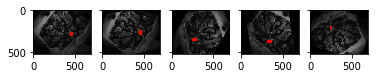

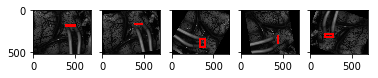

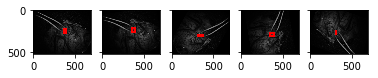

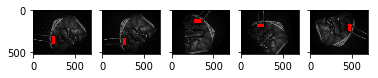

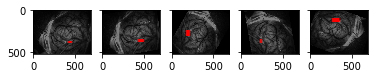

In [16]:
aug = [tr.Rotate(10), tr.Rotate(-120), tr.Rotate(280), tr.Rotate(-200)]
plot_aug(org_images, get_boxes(), aug)

## Fliping horizontally and vertically or both (randomly)

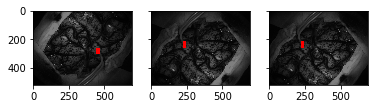

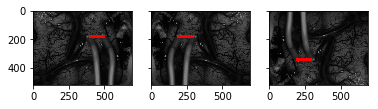

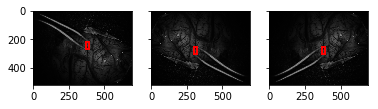

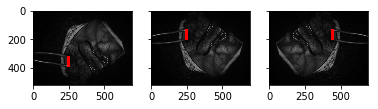

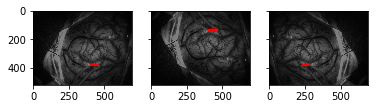

In [17]:
aug = [tr.RandomFlip(), tr.RandomFlip()]
plot_aug(org_images, get_boxes(), aug)

## RandomShift

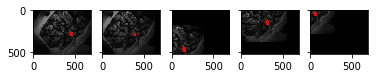

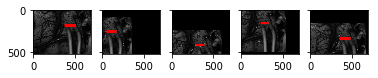

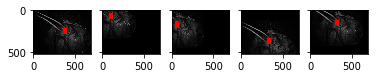

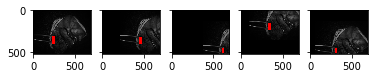

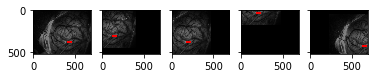

In [20]:
aug = [tr.RandomShift(), tr.RandomShift(), tr.RandomShift(),tr.RandomShift()]
plot_aug(org_images, get_boxes(), aug)

## Resizing

shape: (520, 692) [452, 266, 461, 299]
shape: (200, 500) [327, 102, 333, 115]
shape: (300, 399) [261, 153, 266, 172]


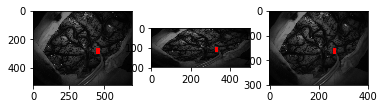

shape: (520, 692) [397, 175, 500, 183]
shape: (200, 500) [287, 67, 361, 70]
shape: (300, 399) [229, 101, 288, 106]


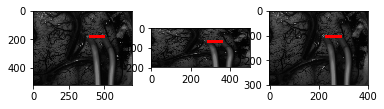

shape: (520, 692) [369, 217, 393, 266]
shape: (200, 500) [267, 83, 284, 102]
shape: (300, 399) [213, 125, 227, 153]


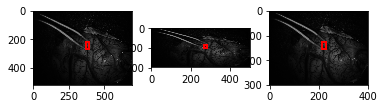

shape: (520, 692) [244, 323, 250, 386]
shape: (200, 500) [176, 124, 181, 148]
shape: (300, 399) [141, 186, 144, 223]


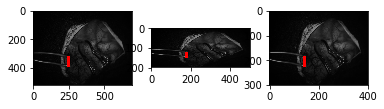

shape: (520, 692) [403, 381, 462, 382]
shape: (200, 500) [291, 147, 334, 147]
shape: (300, 399) [232, 220, 266, 220]


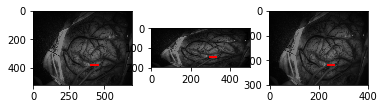

In [21]:
aug = [tr.Resize((200,500)),tr.Resize(300)]
plot_aug_ratio(org_images, get_boxes(), aug)

## RandomRescale

shape: (520, 692) [452, 266, 461, 299]
shape: (260, 346) [226, 133, 230, 150]
shape: (728, 969) [633, 372, 646, 419]


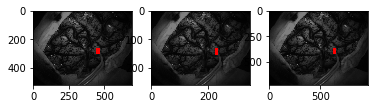

shape: (520, 692) [397, 175, 500, 183]
shape: (312, 415) [238, 105, 300, 110]
shape: (780, 1038) [596, 262, 750, 274]


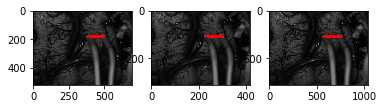

shape: (520, 692) [369, 217, 393, 266]
shape: (364, 484) [258, 152, 275, 186]
shape: (676, 900) [480, 282, 511, 346]


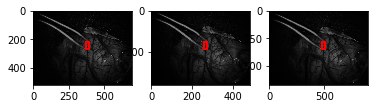

shape: (520, 692) [244, 323, 250, 386]
shape: (312, 415) [146, 194, 150, 232]
shape: (780, 1038) [366, 484, 375, 579]


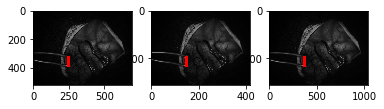

shape: (520, 692) [403, 381, 462, 382]
shape: (260, 346) [202, 190, 231, 191]
shape: (728, 969) [564, 533, 647, 535]


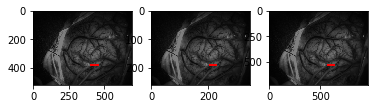

In [22]:
aug = [tr.RandomRescale((0.5,0.7)), tr.RandomRescale((1.3,1.5))]
plot_aug_ratio(org_images, get_boxes(), aug)

shape: (520, 692) [452, 266, 461, 299]
shape: (300, 300) [225, 133, 229, 150]
shape: (300, 300) [34, 251, 45, 291]


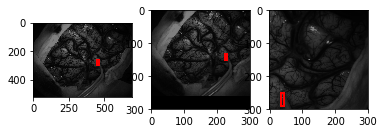

shape: (520, 692) [397, 175, 500, 183]
shape: (300, 300) [169, 88, 221, 92]
shape: (300, 300) [37, 181, 150, 190]


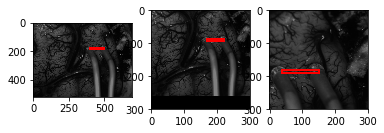

shape: (520, 692) [369, 217, 393, 266]
shape: (300, 300) [149, 108, 161, 133]
shape: (300, 300) [270, 232, 298, 291]


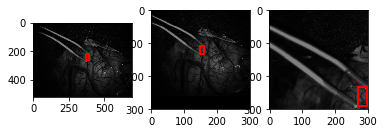

shape: (520, 692) [244, 323, 250, 386]
shape: (300, 300) [22, 166, 26, 210]
shape: (300, 300) [3, 190, 10, 265]


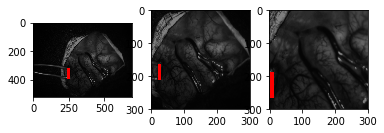

shape: (520, 692) [403, 381, 462, 382]
shape: (300, 300) [201, 223, 236, 223]
shape: (300, 300) [215, 148, 286, 149]


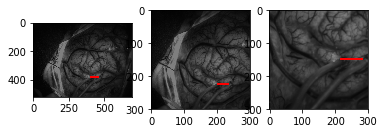

In [27]:
aug = [tr.Compose([tr.RandomRescale((0.5,0.7)), tr.RandomCrop(300)]), tr.Compose([tr.RandomRescale((1.1,1.3)),tr.RandomCrop(300)])]
plot_aug_ratio(org_images, get_boxes(), aug)

## Pad

shape: (520, 692) [452, 266, 461, 299]
shape: (620, 892) [452, 266, 461, 299]
shape: (620, 692) [452, 266, 461, 299]


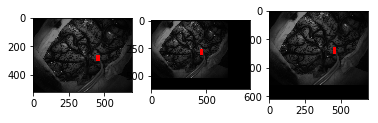

shape: (520, 692) [397, 175, 500, 183]
shape: (620, 892) [397, 175, 500, 183]
shape: (620, 692) [397, 175, 500, 183]


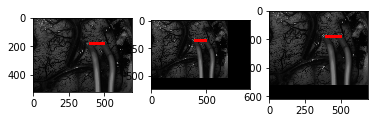

shape: (520, 692) [369, 217, 393, 266]
shape: (620, 892) [369, 217, 393, 266]
shape: (620, 692) [369, 217, 393, 266]


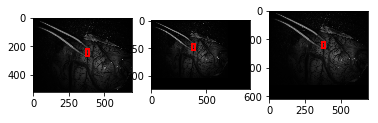

shape: (520, 692) [244, 323, 250, 386]
shape: (620, 892) [244, 323, 250, 386]
shape: (620, 692) [244, 323, 250, 386]


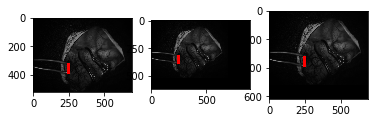

shape: (520, 692) [403, 381, 462, 382]
shape: (620, 892) [403, 381, 462, 382]
shape: (620, 692) [403, 381, 462, 382]


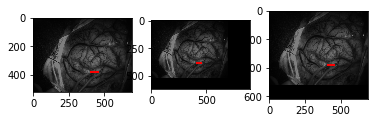

In [28]:
aug = [tr.Pad(100,200), tr.Pad(100,0)]
plot_aug_ratio(org_images, get_boxes(), aug)

## RandomCrop

shape: (520, 692) [452, 266, 461, 299]
shape: (100, 200, 1) [96, 65, 105, 98]
shape: (412, 412, 1) [350, 224, 359, 257]
shape: (150, 500, 1) [431, 102, 440, 135]


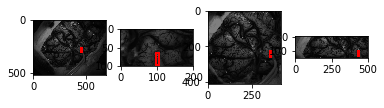

shape: (520, 692) [397, 175, 500, 183]
shape: (100, 200, 1) [73, 11, 176, 19]
shape: (412, 412, 1) [185, 90, 288, 98]
shape: (150, 500, 1) [316, 67, 419, 75]


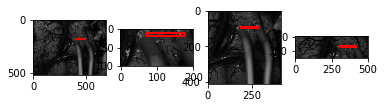

shape: (520, 692) [369, 217, 393, 266]
shape: (100, 200, 1) [158, 20, 182, 69]
shape: (412, 412, 1) [365, 201, 389, 250]
shape: (150, 500, 1) [352, 30, 376, 79]


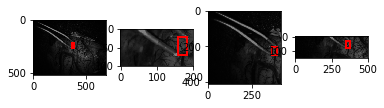

shape: (520, 692) [244, 323, 250, 386]
shape: (100, 200, 1) [15, 19, 21, 82]
shape: (412, 412, 1) [92, 226, 98, 289]
shape: (150, 500, 1) [181, 56, 187, 119]


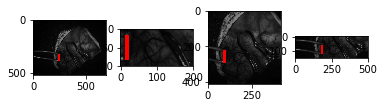

shape: (520, 692) [403, 381, 462, 382]
shape: (100, 200, 1) [54, 60, 113, 61]
shape: (412, 412, 1) [302, 378, 361, 379]
shape: (150, 500, 1) [322, 40, 381, 41]


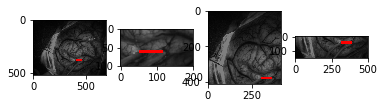

In [29]:
aug = [tr.RandomCrop((100,200)), tr.RandomCrop(412), tr.RandomCrop((150,500))]
plot_aug_ratio(org_images, get_boxes(), aug)

## RandomBrigthness

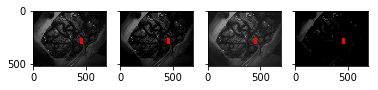

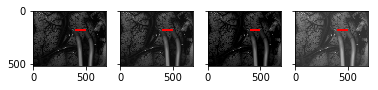

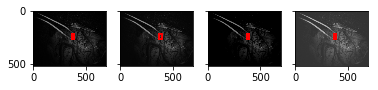

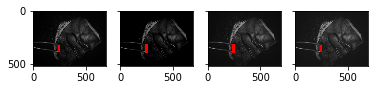

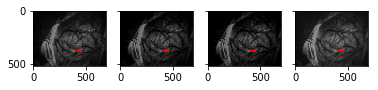

In [30]:
aug = [tr.RandomBrightness(500), tr.RandomBrightness(1000), tr.RandomBrightness(2000)]
plot_aug(org_images, get_boxes(), aug)

## RandomContrast

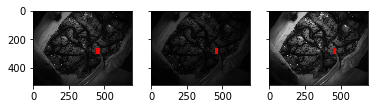

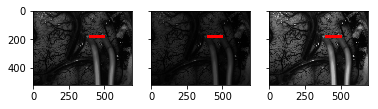

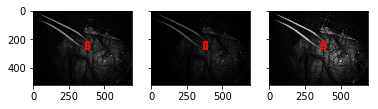

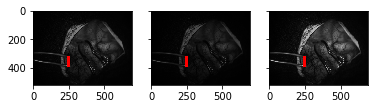

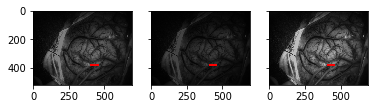

In [31]:
aug = [tr.RandomContrast(0.5,0.6), tr.RandomContrast(1.4,1.5)]
plot_aug(org_images, get_boxes(), aug)

## Resize + RandomCrop

shape: (520, 692) [452, 266, 461, 299]
shape: (300, 300) [166, 153, 171, 172]


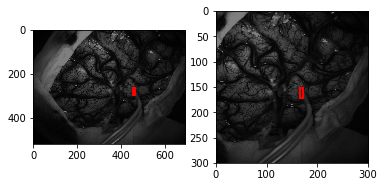

shape: (520, 692) [397, 175, 500, 183]
shape: (300, 300) [184, 101, 243, 106]


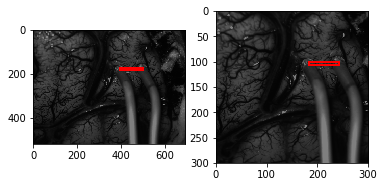

shape: (520, 692) [369, 217, 393, 266]
shape: (300, 300) [148, 125, 162, 153]


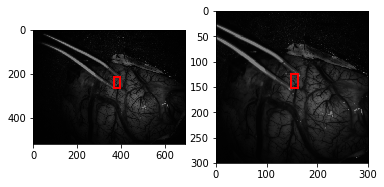

shape: (520, 692) [244, 323, 250, 386]
shape: (300, 300) [94, 186, 97, 223]


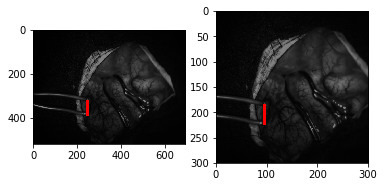

shape: (520, 692) [403, 381, 462, 382]
shape: (300, 300) [164, 220, 198, 220]


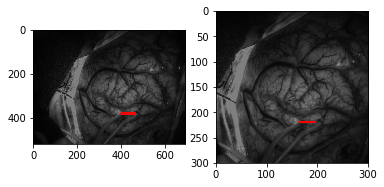

In [32]:
aug = [tr.Compose([tr.Resize(300), tr.RandomCrop(300)])]
plot_aug_ratio(org_images, get_boxes(), aug)

## RandomRotate

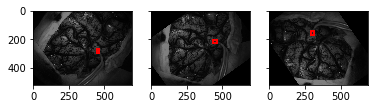

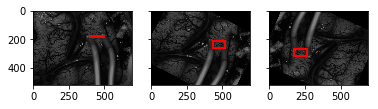

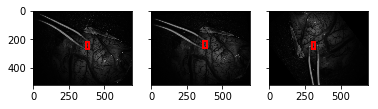

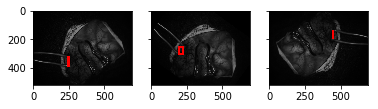

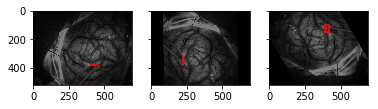

In [33]:
aug = [tr.RandomRotate((-90,90)), tr.RandomRotate((90,180))]
plot_aug(org_images, get_boxes(), aug)

## TrainAugmentations for SSD

Test without the conversion to pytorch tensor and percent coordinates of the bounding box

In [12]:
import ssd.transforms.preprocessing as pr

[452, 266, 461, 299]
[1, 0, 0, 0]


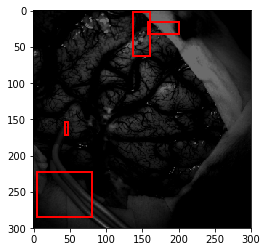

[397, 175, 500, 183]
[1, 0, 0, 0]


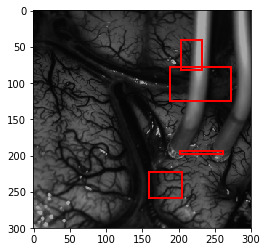

[369, 217, 393, 266]
[1, 0, 0, 0]


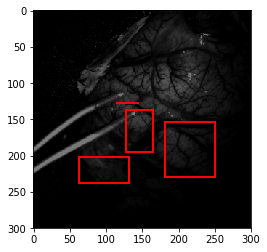

[244, 323, 250, 386]
[1, 0, 0, 0]


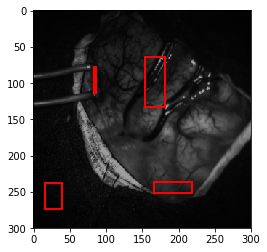

[403, 381, 462, 382]
[1, 0, 0, 0]


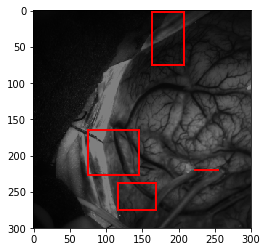

In [18]:
aug = pr.TrainAugmentation(size=300, p=0.7)
plot_multi_box(org_images, get_boxes(), aug)

## Create Random bounding boxes

In [14]:
def show_frames_multi_box(frame, bboxes, ax):
    """Show image with landmarks"""
    if frame.ndim == 3:
        if frame.shape[2] == 1:
            frame = np.squeeze(frame)
            
    ax.imshow(frame, cmap='gray', vmin=0, vmax=8191)
    for bbox in bboxes:
        # xy, width, height with xy lower left
        coord = (bbox[0],bbox[1])
        width = bbox[2]-bbox[0]
        height = bbox[3]-bbox[1]
        rect = patches.Rectangle(coord,width,height,linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        

In [15]:
def plot_multi_box(images, bboxes, aug):
    for file,bbox in zip(images,bboxes):
        image = read_sample(file)
        print(bbox)
        image, bboxes, labels = aug(image, bbox, 1)
        fig, ax= plt.subplots(1, 1, sharey=True)
        show_frames_multi_box(image, bboxes, ax)
        print(labels)
        plt.show()

[452, 266, 461, 299]
[1, 0, 0, 0, 0, 0]


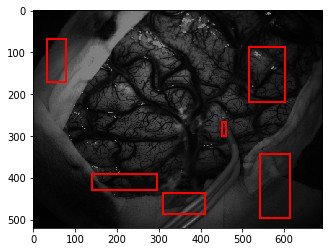

[397, 175, 500, 183]
[1, 0, 0, 0, 0, 0]


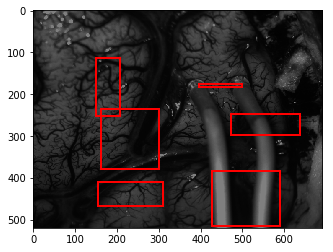

[369, 217, 393, 266]
[1, 0, 0, 0, 0, 0]


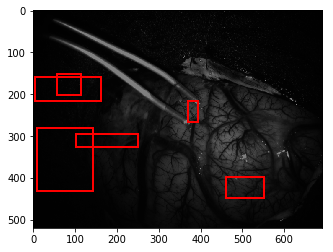

[244, 323, 250, 386]
[1, 0, 0, 0, 0, 0]


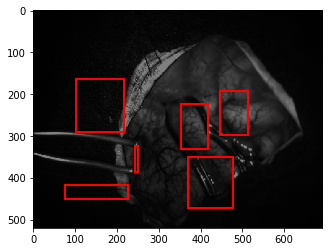

[403, 381, 462, 382]
[1, 0, 0, 0, 0, 0]


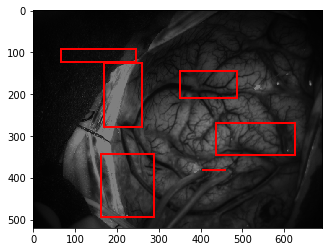

In [16]:
create_boxes = tr.CreateRandomNegativeBoxes(max_iou=0.0, amount=5)
plot_multi_box(org_images, get_boxes(), create_boxes)